<a href="https://colab.research.google.com/github/MatchLab-Imperial/deep-learning-course/blob/master/week01_part2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific packages

In this tutorial, we are going to introduce some of the features of three scientific packages, NumPy, Pandas and Matplotlib, which are essential tools for data scientists.



## Numpy
[Official Documentation](https://docs.scipy.org/doc/numpy/reference/)

it is an open source package for scientific computing with Python containing:
1.   powerful N-dimensional array object;
2.   sophisticated (broadcasting) functions;
3.   useful functions for integrating C/C++ code;
4.   linear algebra and random number capabilities







### ndarray 

An efficient structure for multidimensional array facilitating broadcast and vectorization.

Examples of creation of numpy arrays:

In [1]:
import numpy as np
# Initialize an array in Numpy with a list.
prime_numbers = np.array([2,3,5,7,11,13,17,19], dtype=np.int32)
                          
print(prime_numbers)

## Access elements
print(prime_numbers[0], prime_numbers[5])

[ 2  3  5  7 11 13 17 19]
(2, 13)


In [2]:
# You can also initialize arrays with more dimensions
a = np.array([[2,3.5,1],[1,0,4]])
print(a)

[[2.  3.5 1. ]
 [1.  0.  4. ]]


In [3]:
# Alternative inizialization methods.
# Forms a matrix of 3x3 filled by 0
a = np.zeros((3,3))


# Check the shape of the matrix
print(a.shape)
print(a)

(3, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [4]:
# Forms a matrix of 3x3 filled by 1
a = np.ones((3,3))
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
# Creates 2x2 identity matrix
print(np.eye(2))

# Creates a constant matrix of 2x1
print(np.full((2,1), 3))

# Creates a random matrix (uniform in range [0,1)) of 2x3
print(np.random.random((2,3)))

[[1. 0.]
 [0. 1.]]
[[3]
 [3]]
[[0.16393575 0.76530175 0.44704699]
 [0.38508622 0.6449805  0.92598091]]


### Indexing
You can index the arrays by using integer indexing and giving an index per dimension.

In [6]:
a = np.ones((2, 2))
# To change the element (1,1) we do
a[1,1] = 0

print(a)

[[1. 1.]
 [1. 0.]]


You can also use slices, which takes a subarray by using the format `first_index:last_index` where `last_index` is not included in the slice

In [7]:
a = np.eye(5)
print(a[0:3, 2])
## Doing a[n] is equivalent to a[n, :]
a[1] = 0
print(a)

[0. 0. 1.]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### Casting

We can also change the type of the array.

In [8]:
# Type casting
a = np.asarray([1.2, 4.3])
a = a.astype(np.int32)
print(a.dtype, a)

(dtype('int32'), array([1, 4], dtype=int32))


### Mathematical operations

We can easily do basic array math using both standard operators like + or numpy functions

In [9]:
# Vectorization examples
a = np.eye(2)
b = np.array([[2, 1.5], [3, 2.4]])

sum_v = a + b
print(sum_v)
print(np.add(a, b))

[[3.  1.5]
 [3.  3.4]]
[[3.  1.5]
 [3.  3.4]]


In [10]:
sub_v = a - b
print(sub_v)
print(np.subtract(a, b))

[[-1.  -1.5]
 [-3.  -1.4]]
[[-1.  -1.5]
 [-3.  -1.4]]


In [11]:
mul_v = a * b
print(mul_v)
print(np.multiply(a, b))

[[2.  0. ]
 [0.  2.4]]
[[2.  0. ]
 [0.  2.4]]


In [12]:
mul_v = a / b
print(mul_v)
print(np.divide(a, b))

[[0.5        0.        ]
 [0.         0.41666667]]
[[0.5        0.        ]
 [0.         0.41666667]]


In [13]:
print(b**0.5)
print(np.sqrt(b))


[[1.41421356 1.22474487]
 [1.73205081 1.54919334]]
[[1.41421356 1.22474487]
 [1.73205081 1.54919334]]


In MATLAB the `*` operation is a matrix multiplication, but here it stands for elementwise multiplication (`.*` in MATLAB). To do matrix multiplication we need to use the ```np.dot``` function.

In [14]:
a = np.array([[2, 1.5], [3, 2.4]])
b = np.eye(2)
print(a*b)
print(np.dot(a,b))

[[2.  0. ]
 [0.  2.4]]
[[2.  1.5]
 [3.  2.4]]


Some other operations are:

In [15]:
# Matrix broadcast multiplication.
A = np.random.random((2,2))
print(A)

A_inv = np.linalg.inv(A) # inverse
print(A_inv)

A_det = np.linalg.det(A) # determinant
print(A_det)

A_diag = np.diag(A) # diagonal
print(A_diag)

[[0.89218161 0.34986084]
 [0.12686408 0.92962461]]
[[ 1.18422128 -0.44567738]
 [-0.16160839  1.13652376]]
0.7850092080714209
[0.89218161 0.92962461]


In [16]:
# Linear algebra operations.
a = np.array([1,2,3])
b = np.array([2,4,6])

ab = np.inner(a,b) # inner product
print(ab)

ab = np.outer(a,b) # outer product
print(ab)


28
[[ 2  4  6]
 [ 4  8 12]
 [ 6 12 18]]


### Broadcasting
Numpy lets us do operations with arrays of different sizes. The smaller array will be modified to have compatible shapes with the larger array. An easy example is multiplying a scalar by a matrix e.g. `3.0 * a`, where the `3.0` term is multiplied by all the elements in `a`.

The basics and the rules for broadcasting are listed [here](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Another example is:

In [17]:
a = np.array([2, 3, 3, 4])
b = np.array([1, 7, 5])
try:
  a + b
except Exception as e:
  print(e)

# By adding a new axis to a, due to broadcasting the output c
# will have shape (3, 4), and the elements will be 
# c[0] = b + a[0], c[1] = b + a[1], c[2] = b + a[2], c[3] = b + a[3]
c = a[:, np.newaxis] + b
print(c)
print(c[0], b + a[0])

operands could not be broadcast together with shapes (4,) (3,) 
[[ 3  9  7]
 [ 4 10  8]
 [ 4 10  8]
 [ 5 11  9]]
(array([3, 9, 7]), array([3, 9, 7]))


## Pandas 
[Official Pandas Cookbook with examples](https://github.com/jvns/pandas-cookbook)


The name comes from the term *panel data*. It is an open source and easy-to-use data structures and data analysis tool.

Main distinctive capabilities include:
1. a fast and efficient DataFrame object for data manipulation;
2. tools for reading and writing data;
3. data alignment and integrated handling of missing data;
4. high performance merging and joining of data sets;
5. hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure.

In [18]:
# For pandas examples we will need a csv file to load with some data
# We use a file from this public repo https://github.com/shantnu/Intro-to-Pandas/
# In Colab you can use command-line commands by putting ! in front of them
# So we use wget to download the file
!wget https://raw.githubusercontent.com/shantnu/Intro-to-Pandas/master/hubble_data.csv

--2019-01-14 14:22:11--  https://raw.githubusercontent.com/shantnu/Intro-to-Pandas/master/hubble_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222 [text/plain]
Saving to: ‘hubble_data.csv’

hubble_data.csv     100%[===================>]     222  --.-KB/s    in 0s      

2019-01-14 14:22:16 (26.0 MB/s) - ‘hubble_data.csv’ saved [222/222]



In [19]:
# Read a file and store its data to a dataframe, 
# which is the data structure to handle 2d data in Panda.
import pandas as pd

hubble = pd.read_csv("hubble_data.csv")

# We see that the dataframe has also a header (column names)
print(hubble)

    distance  recession_velocity
0      0.032                 170
1      0.034                 290
2      0.214                -130
3      0.263                 -70
4      0.275                -185
5      0.275                -220
6      0.450                 200
7      0.500                 290
8      0.500                 270
9      0.630                 200
10     0.800                 300
11     0.900                 -30
12     0.900                 650
13     0.900                 150
14     0.900                 500
15     1.000                 920
16     1.100                 450
17     1.100                 500
18     1.400                 500
19     1.700                 960
20     2.000                 500
21     2.000                 850
22     2.000                 800
23     2.000                1090


In [20]:
# Get info about the data type.
type(hubble)

pandas.core.frame.DataFrame

In [21]:
# Get info about the content of csv file.
hubble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
distance              24 non-null float64
recession_velocity    24 non-null int64
dtypes: float64(1), int64(1)
memory usage: 456.0 bytes


In [22]:
# Visualize first two rows.
hubble.head(2)

,distance,recession_velocity
0,0.032,170
1,0.034,290


In [23]:
# Convert dataframe to numpy array data structure.
H = hubble.as_matrix()
type(H)

numpy.ndarray

### Indexing

We can index the dataframe by the column name which will return the whole column, or by using `hubble.iloc[row_index, column_index]` 

In [24]:
hubble['distance'].head(3)

0    0.032
1    0.034
2    0.214
Name: distance, dtype: float64

In [25]:
# This returns the same as above
hubble.iloc[:, 0].head(3)

0    0.032
1    0.034
2    0.214
Name: distance, dtype: float64

In [26]:
# Now it returns the first row
hubble.iloc[0]

distance                0.032
recession_velocity    170.000
Name: 0, dtype: float64

In [27]:
# Check data type of a dataframe column, which is expected to be series:
# while data frames is for 2d data, series is a data structure for 1d data.
type(hubble['distance'])

pandas.core.series.Series

In [28]:
# Access to data using some criterions similarly to a query in MySQL:
# for example, the following code gives as output all the rows
# where the recession_velocity is negative.
# Note that while previously we have seen that Panda indexing refers to columns,  
# now we are selecting rows
hubble[ hubble['recession_velocity'] < 0 ]


,distance,recession_velocity
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
11,0.900,-30


In [29]:
# Skip 15 rows in the footer while reading input file.
# This is particularly useful when there is irrelevant content in the footer.
hubble = pd.read_csv("hubble_data.csv",engine='python',skipfooter=15)
print(hubble)


   distance  recession_velocity
0     0.032                 170
1     0.034                 290
2     0.214                -130
3     0.263                 -70
4     0.275                -185
5     0.275                -220
6     0.450                 200
7     0.500                 290
8     0.500                 270


In [30]:
# In same cases it may be necessary to rename column names, 
# for example, to make them shorter and more readable like in the following case ..
hubble.columns

Index([u'distance', u'recession_velocity'], dtype='object')

In [31]:
# Rename column names.
hubble.columns = ["dist", "rec_vel"]
hubble['dist'].head(2)

0    0.032
1    0.034
Name: dist, dtype: float64

In [32]:
# Panda include some tools to make sophisticate operations with data, i.e., apply() function.
# apply() can be used either to process specific rows
hubble['dist'] = hubble.apply(lambda row: row['dist'] + row['rec_vel']/10000, axis=1)
print(hubble['dist'])



0    0.0490
1    0.0630
2    0.2010
3    0.2560
4    0.2565
5    0.2530
6    0.4700
7    0.5290
8    0.5270
Name: dist, dtype: float64


In [33]:
# or to apply a global operation to dataframe.
import numpy as np
hubble = hubble.apply(np.max, axis=0)
print(hubble)

dist         0.529
rec_vel    290.000
dtype: float64


## Matplotlib
[Official Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

It is a Python 2D plotting library which produces graphs in a variety of formats and interactive environments across platforms
Matplotlib allows to generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.







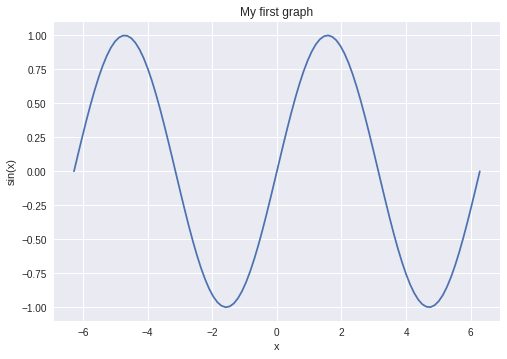

In [34]:
# Plot a graph.
import matplotlib.pyplot as plt
import numpy as np
x= np.linspace(1*-2*np.pi,2*np.pi,100)
y= np.sin(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('My first graph')
plt.show()

In [0]:
# Download another example
!wget -q https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

[-122.23 -122.22 -122.24 ... -121.22 -121.32 -121.24]
[37.88 37.86 37.85 ... 39.43 39.43 39.37]


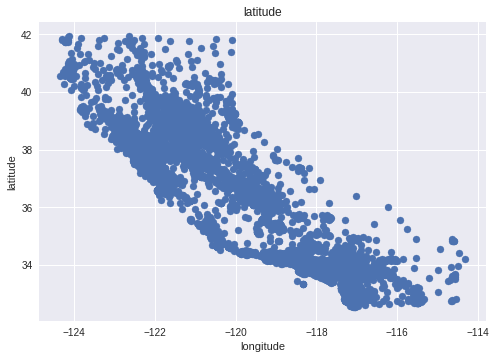

In [36]:
# Scatter.
housing = pd.read_csv("housing.csv").as_matrix()
x=housing[:,0]
y=housing[:,1]
print(x)
print(y)
plt.scatter(x,y)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('latitude')
plt.show()


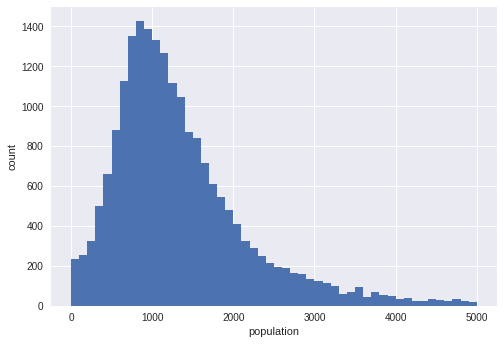

In [37]:
# Plot histograms
population = housing[:,5].astype(int)
plt.xlabel('population')
plt.ylabel('count')
plt.hist(population, bins=50, range=(0, 5000))
plt.show()

In [0]:
# Visualizing images
!wget -q -O cat.jpg https://www.catster.com/wp-content/uploads/2018/07/Savannah-cat-long-body-shot.jpg
import matplotlib.image as mpimg
img = mpimg.imread('cat.jpg')


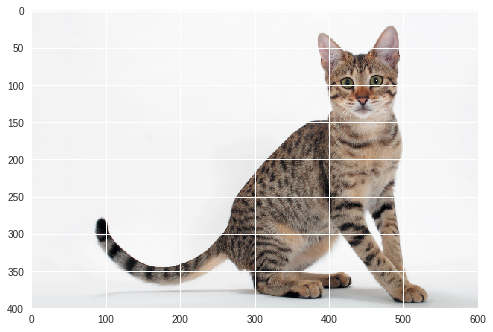

In [39]:
imgplot = plt.imshow(img)